<a href="https://colab.research.google.com/github/neerajac19/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### **Load data into the dataframe**



In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium.plugins import HeatMap
import plotly.express as px


# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
file_path ="/content/drive/MyDrive/Colab Notebooks/Module1/Capstone Project/Copy of Hotel Bookings.csv"

In [ ]:
#reading file path
df=pd.read_csv(file_path)

In [ ]:
#counting number of data
df.shape

(119390, 32)

In [ ]:
# Taking a look to data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Info about the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Cleaning data**

**While cleaning data we will perform following steps:**
1. Remove duplicate rows
2. Handling missing values.
3. Convert columns to appropriate datatypes.


### <b> Step 1: Removing duplicate rows if any </b> 

In [ ]:
#calculating number of duplicated rows
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicated rows:",duplicate_rows_df.shape)

Number of duplicated rows: (31994, 32)


In [ ]:
#Droping duplicated rows
df=df.drop_duplicates()


In [ ]:
#count number of records
df.shape

(87396, 32)

### <b> Step2: Handling missing values. </b>

In [ ]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)[:6]

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


Since, company and agent columns have company number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace null values by 0 in these columns.

In [ ]:
#Replacing null values with zeroes
df[['company','agent']] = df[['company','agent']].fillna(0)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

'Nan' values are the missing values due to error of recording data. 
 \
We will replace the null values under this column with mean value of children.

In [ ]:
df['children'].fillna(df['children'].mean(), inplace = True)

Next column with missing value is 'country'.
This column represents the country of origin of customer. \
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
df['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
# Rows with total number of adults, children or babies equal to zero
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [ ]:
#Removing rows with adults, children or babies equal to zero
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

### <b> Step 3: Converting columns to appropriate datatypes. </b>

In [ ]:
# Converting datatype of columns 'children', 'company', 'agent' , 'adr' from float to int.
df[['children', 'company', 'agent' , 'adr']] = df[['children', 'company', 'agent', 'adr']].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           87396 non-null  object
 1   is_canceled                     87396 non-null  int64 
 2   lead_time                       87396 non-null  int64 
 3   arrival_date_year               87396 non-null  int64 
 4   arrival_date_month              87396 non-null  object
 5   arrival_date_week_number        87396 non-null  int64 
 6   arrival_date_day_of_month       87396 non-null  int64 
 7   stays_in_weekend_nights         87396 non-null  int64 
 8   stays_in_week_nights            87396 non-null  int64 
 9   adults                          87396 non-null  int64 
 10  children                        87396 non-null  int64 
 11  babies                          87396 non-null  int64 
 12  meal                            87396 non-nul

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

# **BOOKING CANCELLATION DETAILS**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


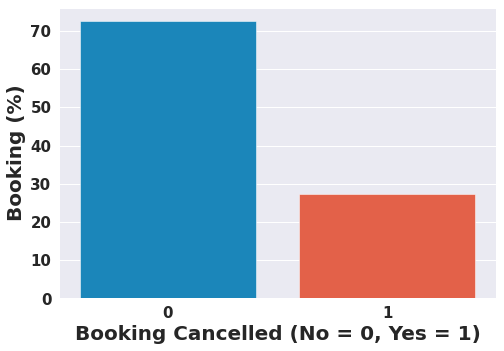

In [ ]:
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

## **OBSERVATION**

### **More than 70% of people did not cancel bookings**

For further analysis, Select only those booking which did not get cancelled

In [ ]:
# Booking which did not get cancelled
df_not_canceled = df[df['is_canceled'] == 0]

In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 12.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# **TOP 10 COUNTRIES WITH MAXIMUM NUMBER OF PASSENGERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


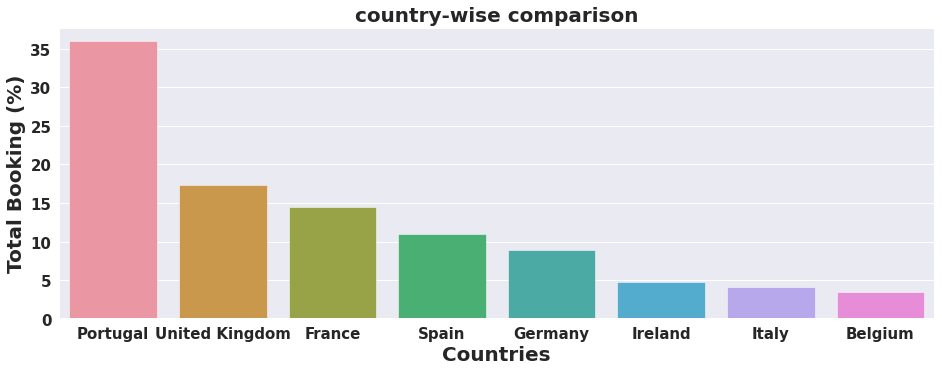

In [ ]:
import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=8)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(14,5))

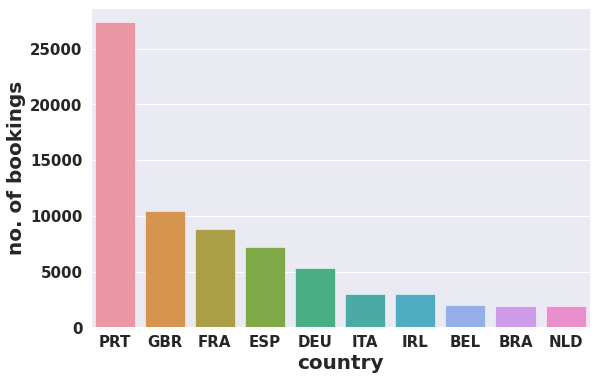

In [ ]:
#Number of bookings of each country
grp_by_country = df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

## **OBSERVATION**
### **Most guests are from Portugal and other countries in Europe.**

#**TYPES OF HOTEL AND THEIR BOOKING DETAILS**

In [ ]:
#Check how many different “hotel” and “customer” types are there
print("Hotel :",df['hotel'].unique())
print("Customers : ",df['customer_type'].unique())

Hotel : ['Resort Hotel' 'City Hotel']
Customers :  ['Transient' 'Contract' 'Transient-Party' 'Group']


**THERE ARE TWO TYPES OF HOTELS 1.RESORT HOTEL AND 2. CITY HOTEL**

### **Which hotel contains maximum bookings**

In [ ]:
df['hotel'].agg(['value_counts'])

,value_counts
City Hotel,53274
Resort Hotel,33956


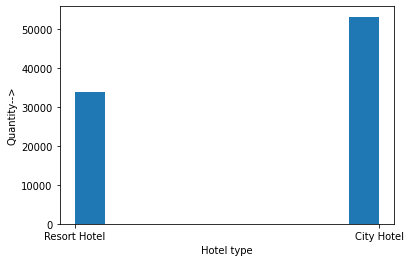

In [ ]:
plt.hist(df['hotel'])
plt.xlabel('Hotel type')
plt.ylabel('Quantity-->')
plt.show()

# **PERCENTAGE OF GUESTS IN CITY AND RESORT HOTEL**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

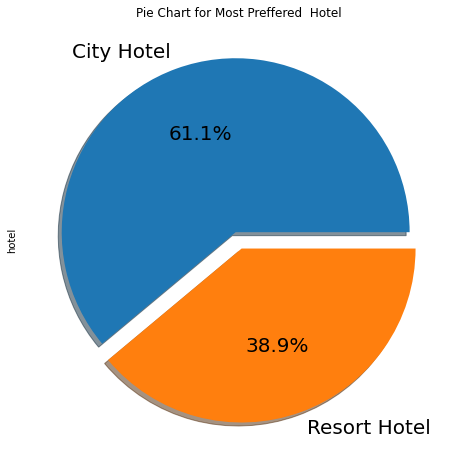

In [ ]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

# **HOTEL WITH MORE REVENUE**



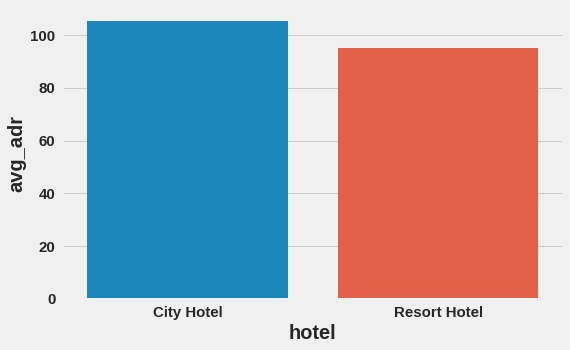

In [ ]:
grouped_by_hotel = df.groupby('hotel')
df = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = df['hotel'], y = df['avg_adr'] )
plt.show()

# **HOTEL WITH LONG WAITING TIME**

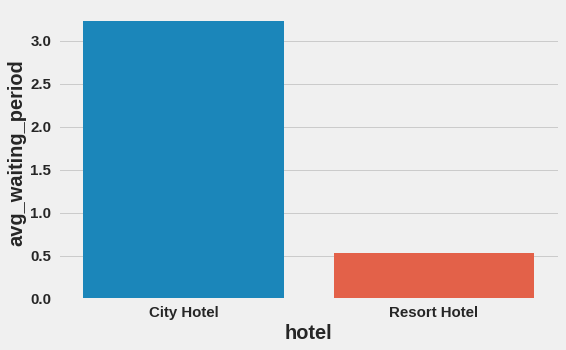

In [ ]:
df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = df['hotel'], y = df['avg_waiting_period'] )
plt.show()

## **OBSERVATION**
**From above graph we can say that there are 2 types of Hotel**
1. **City Hotel and  2. Resort Hotel having count 53000 and 34000 approx respectively**

2. **City Hotel contains maximum number of bookings of around 61%  compared to Resort Hotel which is 38.9%.**

3. **ADR (Average Daily Rate) of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.**
4. **City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.**

# **How much does guest pay for a room per night ?**

In [ ]:
# Price variation per night over the year?
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
#for resort hotel
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(f"Resort Hotel \n {resort_hotel}")
print('\n')
#For city hotel
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
print(f"city Hotel \n {city_hotel}")

Resort Hotel 
    arrival_date_month         adr
0               April   76.627478
1              August  181.842372
2            December   63.878788
3            February   53.502192
4             January   48.489627
5                July  150.638234
6                June  108.750779
7               March   56.977179
8                 May   77.495548
9            November   48.756881
10            October   62.440471
11          September   98.577067


city Hotel 
    arrival_date_month         adr
0               April  114.015338
1              August  122.572420
2            December   90.515602
3            February   88.003438
4             January   83.146354
5                July  119.782733
6                June  120.451826
7               March   91.044681
8                 May  124.611324
9            November   88.058797
10            October  105.269707
11          September  116.734365


In [ ]:
#FINAL PRICE
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,76.627478,114.015338
1,August,181.842372,122.572420
2,December,63.878788,90.515602
3,February,53.502192,88.003438
4,January,48.489627,83.146354
5,July,150.638234,119.782733
6,June,108.750779,120.451826
7,March,56.977179,91.044681
8,May,77.495548,124.611324
9,November,48.756881,88.058797


**Provide right hierarchy to month column.**

In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=4a6d3a21dd5afa3b757c734a8d7053b916d7dac2cb3391a22d69b933a3c94378
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=20d667d68c59129d4070745f22676ff88788880390c87108ce54ea8d0b0a088e
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.489627,83.146354
1,February,53.502192,88.003438
2,March,56.977179,91.044681
3,April,76.627478,114.015338
4,May,77.495548,124.611324
5,June,108.750779,120.451826
6,July,150.638234,119.782733
7,August,181.842372,122.572420
8,September,98.577067,116.734365
9,October,62.440471,105.269707


In [ ]:
#Room price per night over the Months
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1224x576 with 0 Axes>

## **OBSERVATION**
**This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn**

# **Which is the most booked type of accommodation (Single, Couple, Family)?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


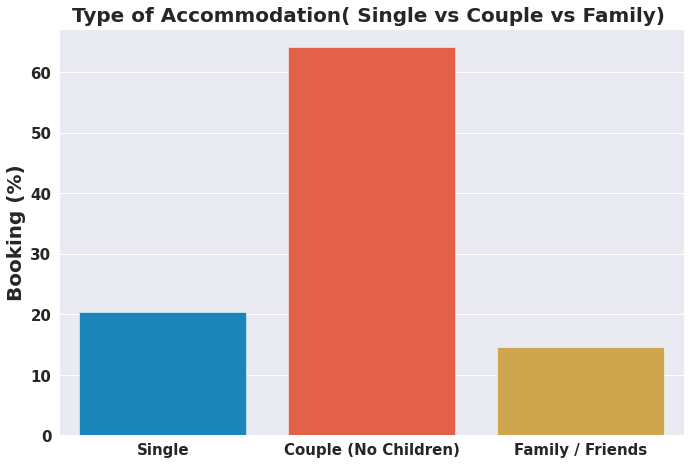

In [ ]:
## Select single, couple, multiple adults and family
df_not_canceled = df[df['is_canceled'] == 0]
single_type   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple_type   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family_type   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies >= 3]


## Make the list of Category names, and their total percentage
type_of_name = ['Single', 'Couple (No Children)', 'Family / Friends']
total_count = [single_type.shape[0],couple_type.shape[0], family_type.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in total_count]


## Draw the curve
plot(type_of_name,count_percent,  y_label='Booking (%)', title='Type of Accommodation( Single vs Couple vs Family) ', figsize=(10,7))

## **OBSERVATION**
**The most booked accommodation type is couple with no children**

# **Types of Customers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



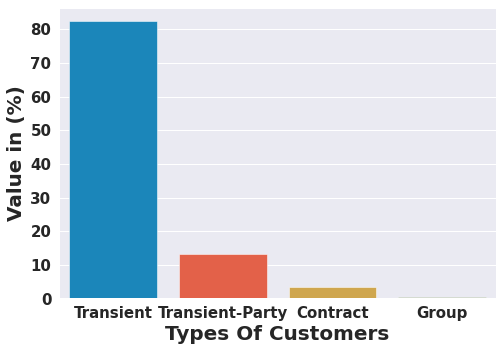

In [ ]:
# we find out Types of Customers i.e Transient vs Contract in hotel and visualize it in bar chart.
x,y = get_count(df['customer_type'])
plot(x,y, x_label='Types Of Customers', y_label='Value in (%)')

## **OBSERVATION**
**The percentage of different types of customers are Transient 82% , Transient-Party 13% , Contract 3% and Group 0%**

# **How many guests repeated in hotel ?**

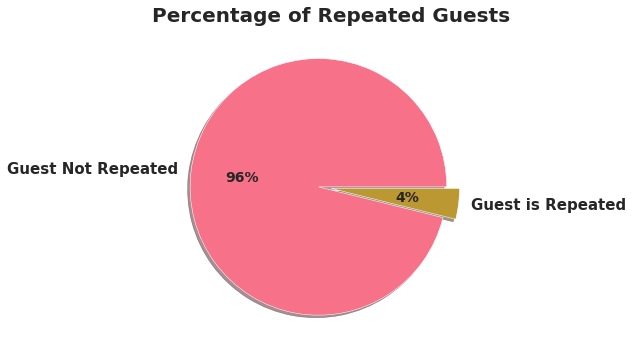

In [ ]:
# we find out how many guest is repeated in hotel and visualize it in pie chart.
x,y = get_count(df['is_repeated_guest'])
x1 = df['is_repeated_guest'].value_counts()
colors = sns.color_palette('husl')[0:2]
explode = (0.1 , 0 ) 
label = ['Guest Not Repeated', 'Guest is Repeated']
plt.pie( y, labels = label , colors = colors, explode=explode, shadow=True,  autopct='%.0f%%')
plt.title(f"Percentage of Repeated Guests")
plt.show()

## **OBSERVATION**
**The chart shows only 4% Guest is Repeated in Hotel. It means 3359 guest out of 83981 is repeated.**

### **How Long People Stay in the hotel?**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



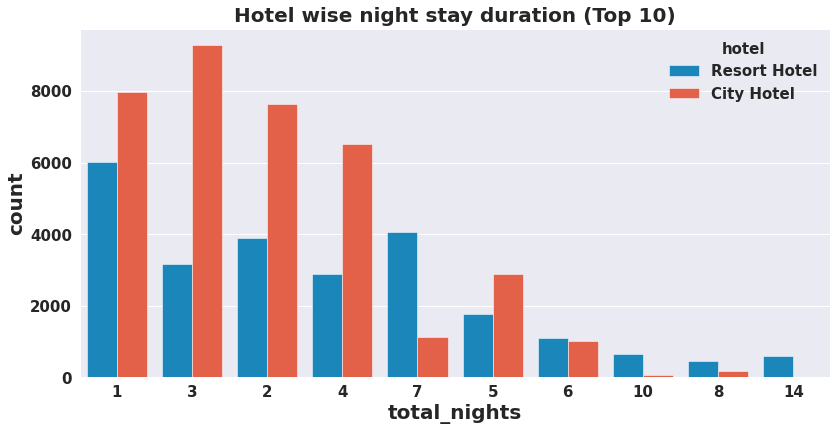

In [ ]:
#Hotel wise night stay duration
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

## **OBSERVATION**
**Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.**

Comparision of Hotels

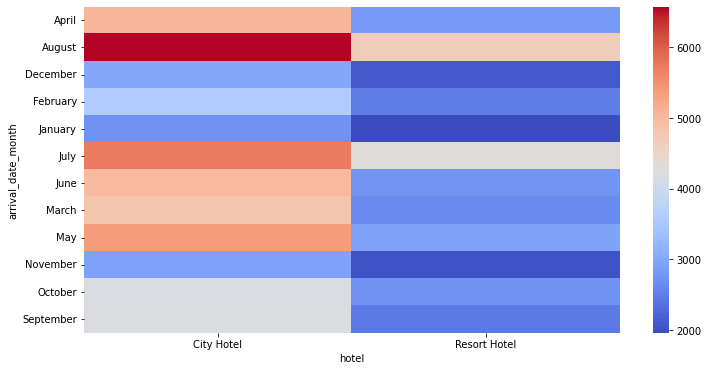

In [ ]:
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

Stays by users

In [ ]:
#adding new column [total_nights]
df['total_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
df[['total_nights']]

,total_nights
0,0
1,0
2,1
3,1
4,2
...,...
119385,7
119386,7
119387,7
119388,7


In [ ]:
stay_days = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay_days = stay_days.iloc[:, :3]                                                   # take 1st 3 columns
stay_days = stay_days.rename(columns={'is_canceled':'Number of stays'})    # rename the columns
stay_days

,total_nights,hotel,Number of stays
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


Text(0.5, 0, 'total_stay in days')

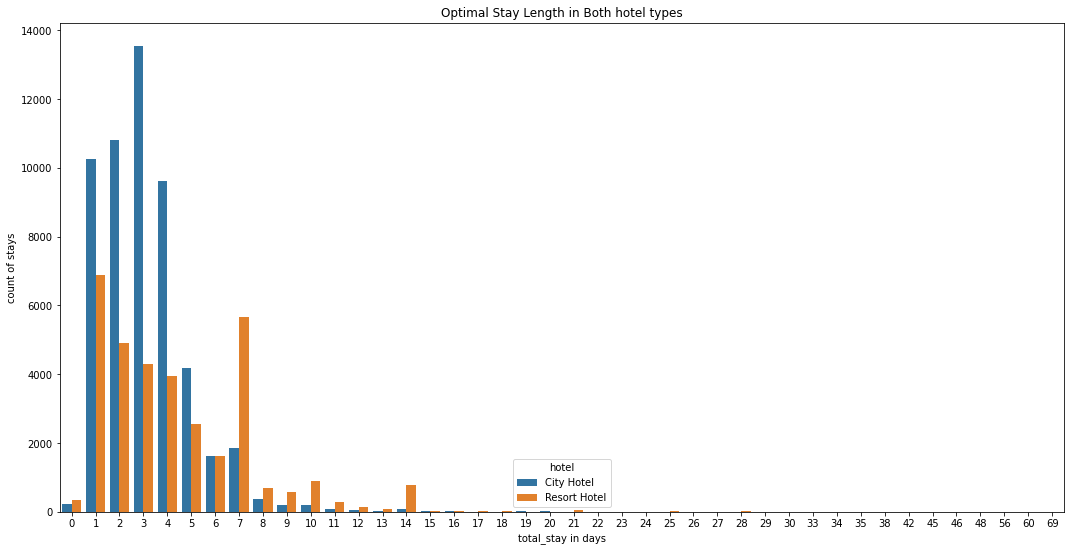

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_nights',y='Number of stays',hue='hotel',data=stay_days)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay in days')


Effect of lead time on cancellation

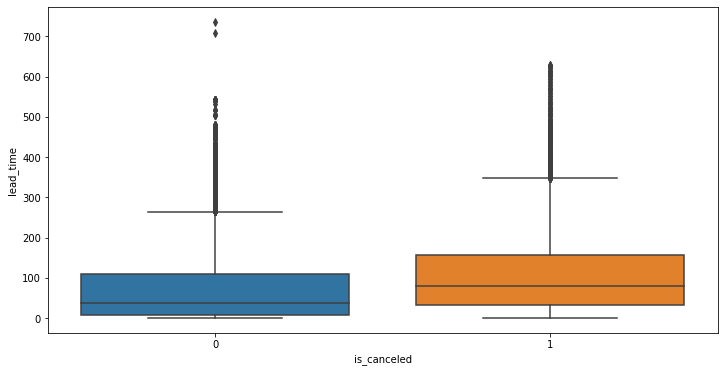

In [ ]:
df2=df[df['is_canceled']=='Yes']
sns.boxplot(x='is_canceled',y='lead_time',data=df)

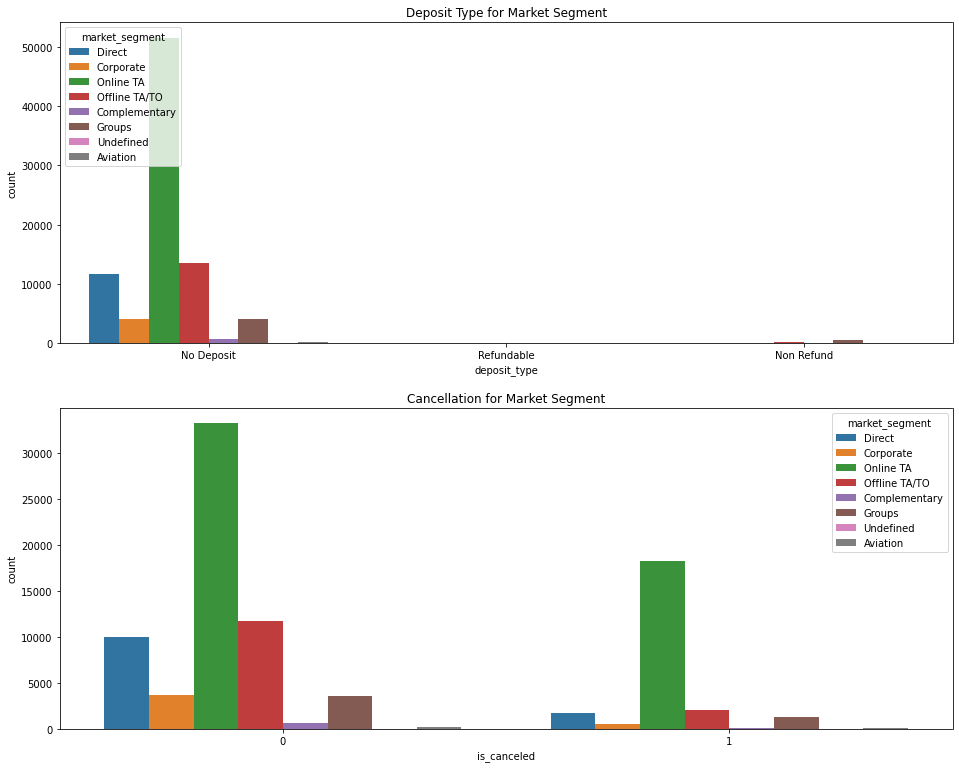

In [ ]:
plt.figure(figsize=(16,13))
plt.subplot(211)
sns.countplot(data= df,x='deposit_type',  hue='market_segment')
plt.title('Deposit Type for Market Segment')

plt.subplot(212)
sns.countplot(data= df,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()

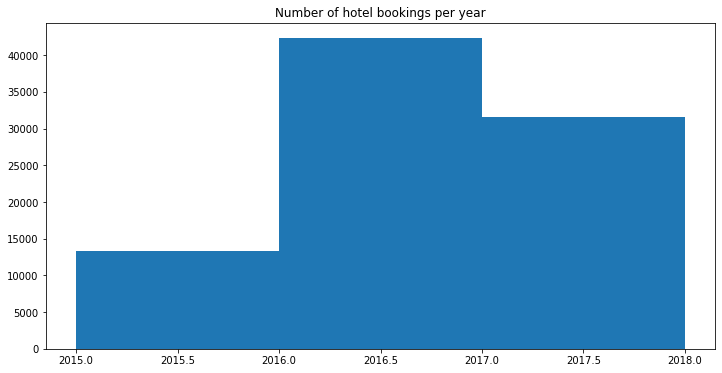

In [ ]:
#Number of bookings over time
plt.title("Number of hotel bookings per year")
plt.hist(df.arrival_date_year, bins=np.arange(2015, 2019,1));

Special Requests

In [ ]:
df.total_of_special_requests.value_counts(normalize=True)*100

0    50.199473
1    33.217930
2    13.521724
3     2.652757
4     0.366846
5     0.041270
Name: total_of_special_requests, dtype: float64

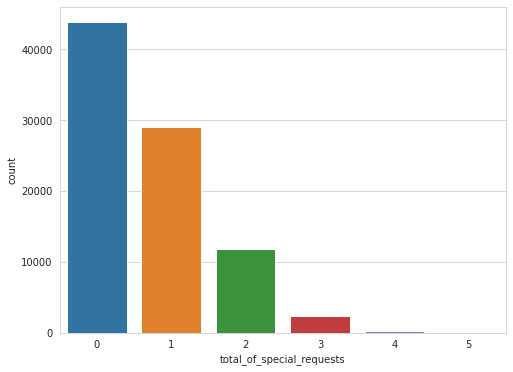

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

AVERAGE NUMBER OF SPECIAL REQUESTS BY CUSTOMER TYPE

Text(0, 0.5, 'Average number of special request')

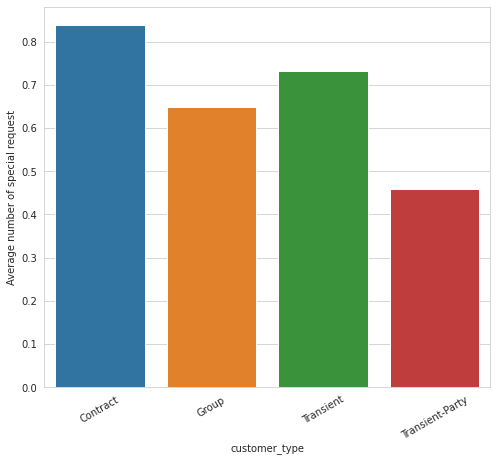

In [ ]:
df3=df.groupby('customer_type')['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=df3.index,y=df3)
p=plt.xticks(rotation=30)
plt.xlabel('customer_type')
plt.ylabel('Average number of special request')



Which distribution channel is mostly prefered

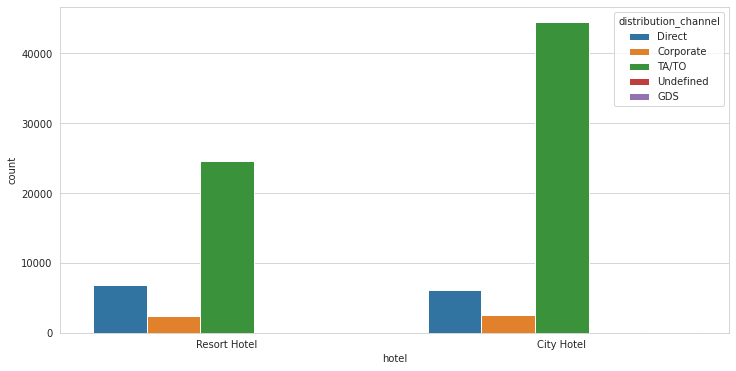

In [ ]:
df.groupby(['hotel'])['distribution_channel'].agg('value_counts')
sns.countplot(x='hotel',hue='distribution_channel',data=df)

ADR RELATION WITH DISTRIBUTION CHANNEL

Text(0.5, 1.0, 'ADR for Distribution channel')

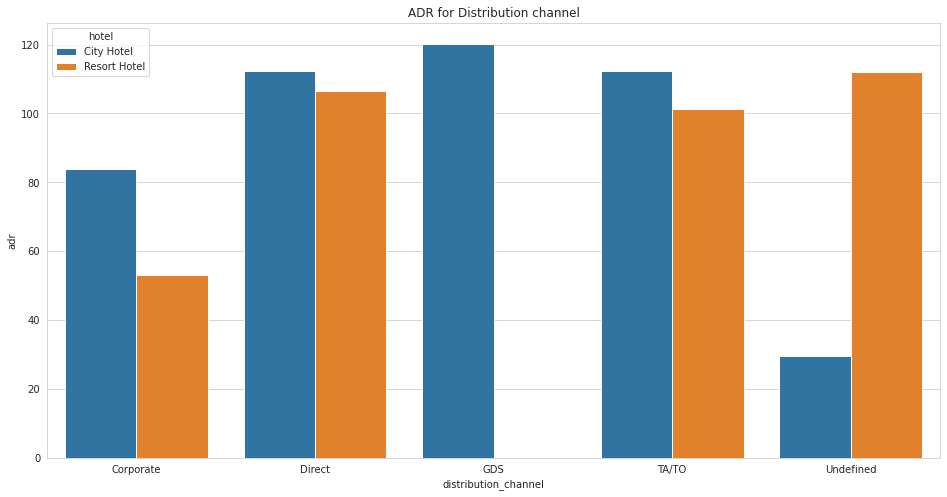

In [ ]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR for Distribution channel')